## Porotifolio Risk Managment Using Python
### Financial Returns Visualisations
#### Lamech Muluya Kibudde Datacamp Courses

In [29]:
# Import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
# Read in the csv file and parse dates
StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=['Date']) # The MSFT stock price data

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print(StockPrices.head())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


        Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


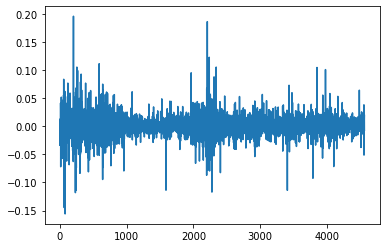

In [30]:
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

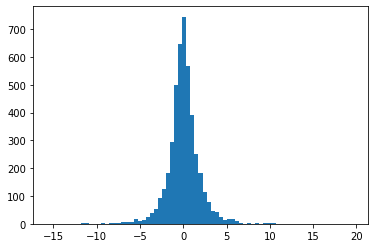

In [31]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75)
plt.show()

## Mean, variance, and normal distribution


In [32]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print("Daily Return", mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print( "Annulised Return", mean_return_annualized)

Daily Return 0.00037777546435757725
Annulised Return 0.09985839482858783


In [33]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print("Daily Standard Deviation",sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print("Daily Variance",variance_daily)

Daily Standard Deviation 0.019341100408708328
Daily Variance 0.0003740781650197374


In [34]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print("Annualised Standard Deviation",sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print("Annualised Variance",variance_annualized)

Annualised Standard Deviation 0.3070304505826317
Annualised Variance 0.09426769758497383


### Third moment: Skewness

In [35]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067852
